# **Churn Analysis**

In [4]:
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.engine import URL

In [5]:
url = URL.create(
    drivername="postgresql",
    username="postgres",
    password="NewStrongPassword@123",
    host="localhost",
    port=5432,
    database="churn_analysis"
)

engine = create_engine(url)

In [6]:
pd.read_sql(
    "SELECT COUNT(*) FROM staging.final_churn_analysis",
    engine
)

,count
0,4372


In [7]:
query = """
SELECT *
FROM staging.final_churn_analysis;
"""

df = pd.read_sql(query, engine)
df.head()

,customer_id,is_churned,customer_lifetime_days,orders_per_day,avg_order_value,days_since_last_purchase,had_support_ticket,ticket_priority,resolution_time_hours,low_satisfaction_flag
0,12346,1,0.0,2.0000,0.00,325.0,0,None,None,0
1,12347,0,365.0,0.0192,615.71,1.0,0,None,None,0
2,12348,0,282.0,0.0142,449.31,74.0,0,None,None,0
3,12349,0,0.0,1.0000,1757.55,18.0,0,None,None,0
4,12350,1,0.0,1.0000,334.40,309.0,0,None,None,0


In [8]:
df.shape

(4372, 10)

In [9]:
df['is_churned'].value_counts(normalize=True)

is_churned
0    0.667429
1    0.332571
Name: proportion, dtype: float64

---
### **Plot 1 - Recency vs Churn**

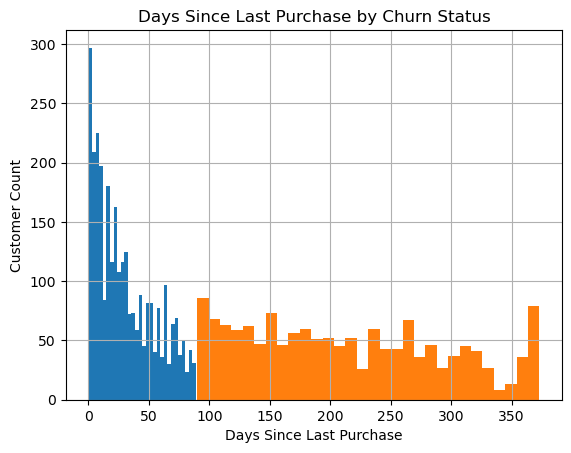

In [10]:
import matplotlib.pyplot as plt

plt.figure()
df[df['is_churned'] == 0]['days_since_last_purchase'].hist(bins=30)
df[df['is_churned'] == 1]['days_since_last_purchase'].hist(bins=30)
plt.title("Days Since Last Purchase by Churn Status")
plt.xlabel("Days Since Last Purchase")
plt.ylabel("Customer Count")
plt.show()

---
### **Plot 2 - Order Frequency vs Churn**

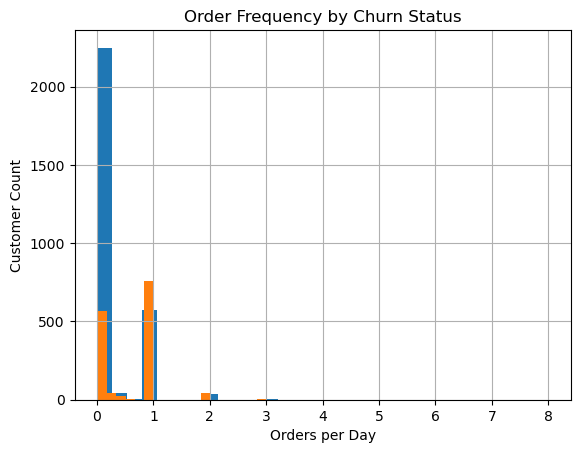

In [11]:
plt.figure()
df[df['is_churned'] == 0]['orders_per_day'].hist(bins=30)
df[df['is_churned'] == 1]['orders_per_day'].hist(bins=30)
plt.title("Order Frequency by Churn Status")
plt.xlabel("Orders per Day")
plt.ylabel("Customer Count")
plt.show()

---
### **Plot 3 - Average Order Value vs Churn**

C:\Users\mohsi\AppData\Local\Temp\ipykernel_18336\1913400891.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


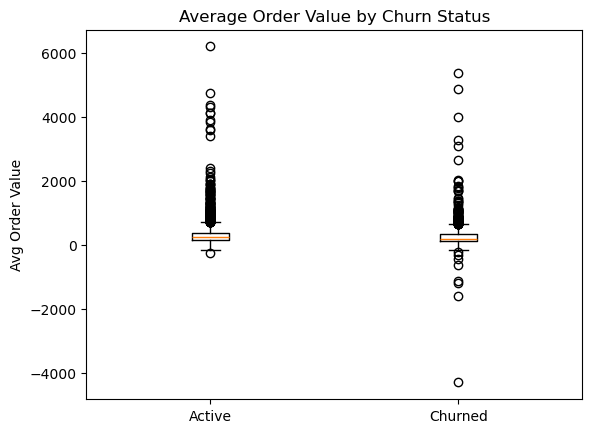

In [12]:
plt.figure()
plt.boxplot(
    [
        df[df['is_churned'] == 0]['avg_order_value'].dropna(),
        df[df['is_churned'] == 1]['avg_order_value'].dropna()
    ],
    labels=['Active', 'Churned']
)
plt.title("Average Order Value by Churn Status")
plt.ylabel("Avg Order Value")
plt.show()

---
---

**Key Behavioral Insights**

- Customer churn is strongly driven by disengagement rather than order value.
- Customers who churn show significantly higher days since last purchase and substantially lower order frequency.
---
- Recency is the most reliable early warning signal.
- Customers with long inactivity periods are disproportionately represented among churned users, making recency an effective intervention trigger.
---
- Average Order Value shows overlap between churned and active customers.
- This suggests churn is not primarily driven by low spenders, but by declining engagement patterns.
---
- Support resolution time shows limited explanatory power due to low variance.
- Most support tickets are resolved within 24 hours, limiting its usefulness as a churn differentiator in this dataset.